In [1]:
import numpy as np   
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
df = pd.read_excel(r'Data_for_UCI_named.xlsx')

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [5]:
df = df.drop(columns='stab')

In [6]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


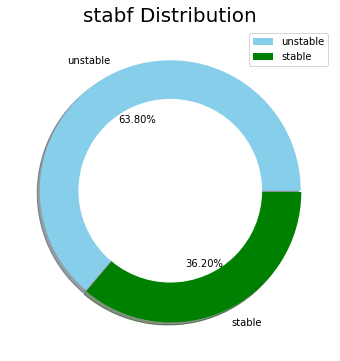

In [7]:
size = df['stabf'].value_counts()
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.figure(figsize=(8,6))
plt.pie(size, colors =['skyblue', 'green'], labels =('unstable','stable'), shadow= True, explode =[0,0.01], autopct ='%.2f%%')
plt.title('stabf Distribution', fontsize = 20)
plt.legend()
p = plt.gcf()
p.gca().add_artist(my_circle)

In [9]:
total = df.isnull().sum().sort_values(ascending = False)
percent = round( df.isnull().sum().sort_values(ascending = False)/len(df)*100 ,2)
pd.concat([total, percent], axis = 1, keys=["Total missing values","Percent"])

,Total missing values,Percent
stabf,0,0.0
g4,0,0.0
g3,0,0.0
g2,0,0.0
g1,0,0.0
p4,0,0.0
p3,0,0.0
p2,0,0.0
p1,0,0.0
tau4,0,0.0


In [10]:
df = df.replace({'stabf': {'stable': 0,'unstable': 1}})

In [11]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


In [12]:
df['stabf'].value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

In [13]:
X = df.drop(columns= 'stabf' )
y = df[ 'stabf' ]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1)
y_train.value_counts()

1    5092
0    2908
Name: stabf, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler


In [16]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.metrics import classification_report

In [18]:
rfc = RandomForestClassifier(random_state = 1)

In [19]:
rfc.fit(x_train_scaled, y_train)
result1 = rfc.predict(x_test_scaled)
acc_rfc = (result1 == y_test).sum().astype(float) / len(result1)*100
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
h1 = classification_report(y_test, result1)
print(h1)

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 92.80
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       712
           1       0.93      0.96      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [20]:
xgb = XGBClassifier(random_state = 1)
xgb.fit(x_train_scaled, y_train)
result2 = xgb.predict(x_test_scaled)
acc_xgb = (result2 == y_test).sum().astype(float) / len(result2)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
h2 = classification_report(y_test, result2)
print(h2)

XGBoost's prediction accuracy is: 91.90
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       712
           1       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [21]:
lgb = LGBMClassifier(random_state = 1)
lgb.fit(x_train_scaled, y_train)
result3 = lgb.predict(x_test_scaled)
acc_lgb = (result3 == y_test).sum().astype(float) / len(result3)*100
print("lightgbm's prediction accuracy is: %3.2f" % (acc_lgb))
h3 = classification_report(y_test, result3)
print(h3)

lightgbm's prediction accuracy is: 93.55
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       712
           1       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



In [22]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [24]:
clf1 = RandomizedSearchCV(ExtraTreesClassifier(random_state = 1), hyperparameter_grid, random_state = 1)
search = clf1.fit(x_train_scaled, y_train)
search_pred = clf1.predict(x_test_scaled)


In [25]:
acc_sch = (search_pred == y_test).sum().astype(float) / len(search_pred)*100
print("RandomSearch's prediction accuracy is: %3.2f" % (acc_sch))
h4 = classification_report(y_test, search_pred)
print(h4)

RandomSearch's prediction accuracy is: 92.85
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       712
           1       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000

